<a href="https://colab.research.google.com/github/lmn190104/yolov5-AI/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Codegit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17493 (delta 2), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17493/17493), 16.56 MiB | 16.77 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.


In [3]:
!pip install --quiet opencv-python-headless torch torchvision

import os
import cv2
import torch
import numpy as np
import glob
from torchvision import transforms
from matplotlib import pyplot as plt

from torch.utils.data import Dataset, DataLoader
from PIL import Image




   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [4]:
# --------- 1. H√†m x·ª≠ l√Ω ·∫£nh v√† nh√£n ------------
def preprocess_image_and_label(img_path, label_path, img_size=416):
    # Load v√† resize ·∫£nh
    img = Image.open(img_path).convert('RGB')
    img = img.resize((img_size, img_size))
    img_tensor = transforms.ToTensor()(img)  # [C, H, W], gi√° tr·ªã [0,1]

    # ƒê·ªçc nh√£n ƒë·ªãnh d·∫°ng YOLO: class_id x_center y_center width height (t√≠nh theo t·ªâ l·ªá)
    with open(label_path, 'r') as f:
        lines = f.readlines()

    labels = []
    for line in lines:
        parts = list(map(float, line.strip().split()))
        labels.append(parts)

    label_tensor = torch.tensor(labels)  # [num_objects, 5]
    return img_tensor, label_tensor

In [5]:
class YoloDataset(Dataset):
    def __init__(self, image_paths, labels_folder, transform=None):
        self.image_paths = image_paths
        self.labels_folder = labels_folder
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        file_name = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(self.labels_folder, file_name + '.txt')

        img_tensor, label_tensor = preprocess_image_and_label(img_path, label_path)

        if self.transform:
            img_tensor = self.transform(img_tensor)

        return img_tensor, label_tensor


In [6]:
# ƒê∆∞·ªùng d·∫´n d·ªØ li·ªáu
images_folder = '/content/drive/MyDrive/TTNTN10/unzipped_data/TRITUENHANTAOnhom10K/images/'
labels_folder = '/content/drive/MyDrive/TTNTN10/unzipped_data/TRITUENHANTAOnhom10K/labels/'

# T·∫°o dataset
dataset = YoloDataset(images_folder, labels_folder)

# T·∫°o dataloader v·ªõi batch_size ph√π h·ª£p RAM
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2, collate_fn=lambda x: tuple(zip(*x)))


In [7]:
from sklearn.model_selection import train_test_split
import glob, os

# L·∫•y danh s√°ch ·∫£nh
all_image_paths = sorted(glob.glob(os.path.join(images_folder, '*.jpg')) +
                         glob.glob(os.path.join(images_folder, '*.png')))

# Chia train/val
train_paths, val_paths = train_test_split(all_image_paths, test_size=0.2, random_state=42)

# T·∫°o dataset v√† dataloader
train_dataset = YoloDataset(train_paths, labels_folder)
val_dataset = YoloDataset(val_paths, labels_folder)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2, collate_fn=lambda x: tuple(zip(*x)))


In [8]:
import os
import shutil
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import glob

# ==== 1. C·∫•u h√¨nh ƒë∆∞·ªùng d·∫´n g·ªëc ====

images_folder = '/content/drive/MyDrive/TTNTN10/unzipped_data/TRITUENHANTAOnhom10K/images'  # <-- ch·ªânh ƒë∆∞·ªùng d·∫´n n√†y
labels_folder = '/content/drive/MyDrive/TTNTN10/unzipped_data/TRITUENHANTAOnhom10K/labels' # <-- ch·ªânh ƒë∆∞·ªùng d·∫´n n√†y

output_base = '/content/yolov5/data_cleaned'  # <-- n∆°i l∆∞u t·∫≠p d·ªØ li·ªáu sau khi chia

# ==== 2. L·∫•y t·∫•t c·∫£ ·∫£nh ====
all_image_paths = sorted(glob.glob(os.path.join(images_folder, '*.jpg')) +
                         glob.glob(os.path.join(images_folder, '*.png')))

# ==== 3. Chia train / val ====
train_paths, val_paths = train_test_split(all_image_paths, test_size=0.2, random_state=42)

# ==== 4. T·∫°o th∆∞ m·ª•c c·∫ßn thi·∫øt ====
for split in ['train', 'val']:
    os.makedirs(os.path.join(output_base, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_base, split, 'labels'), exist_ok=True)

# ==== 5. H√†m sao ch√©p ·∫£nh & nh√£n ====
def copy_data(image_paths, split):
    for img_path in tqdm(image_paths, desc=f'Copying {split} data'):
        file_name = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(labels_folder, file_name + '.txt')

        # ƒê√≠ch ƒë·∫øn
        img_dest = os.path.join(output_base, split, 'images', os.path.basename(img_path))
        label_dest = os.path.join(output_base, split, 'labels', file_name + '.txt')

        # Copy ·∫£nh
        if os.path.exists(img_path):
            shutil.copy(img_path, img_dest)

        # Copy nh√£n
        if os.path.exists(label_path):
            shutil.copy(label_path, label_dest)
        else:
            print(f"[!] Thi·∫øu nh√£n: {label_path}")

# ==== 6. Th·ª±c hi·ªán copy ====
copy_data(train_paths, 'train')
copy_data(val_paths, 'val')


Copying val data: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 448/448 [04:42<00:00,  1.59it/s]


In [9]:
yaml_contentt = """
train: /content/yolov5/data_cleaned/train
val: /content/yolov5/data_cleaned/val

nc: 5
names: ['o to', 'xe bus', 'xe dap', 'xe may', 'xe tai']
"""

with open('datalmn.yaml', 'w') as f:
    f.write(yaml_contentt)



In [10]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 50 --data /content/datalmn.yaml --weights yolov5s.pt --cache


Streaming output truncated to the last 5000 lines.
      28/49      4.14G    0.02015    0.02328    0.00373        140        640:  23% 26/112 [00:19<01:16,  1.12it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      28/49      4.14G    0.02026    0.02325   0.003724        110        640:  24% 27/112 [00:20<01:27,  1.03s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      28/49      4.14G    0.02025    0.02313   0.003742        107        640:  25% 28/112 [00:21<01:08,  1.22it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      28/49      4.14G     0.0203 

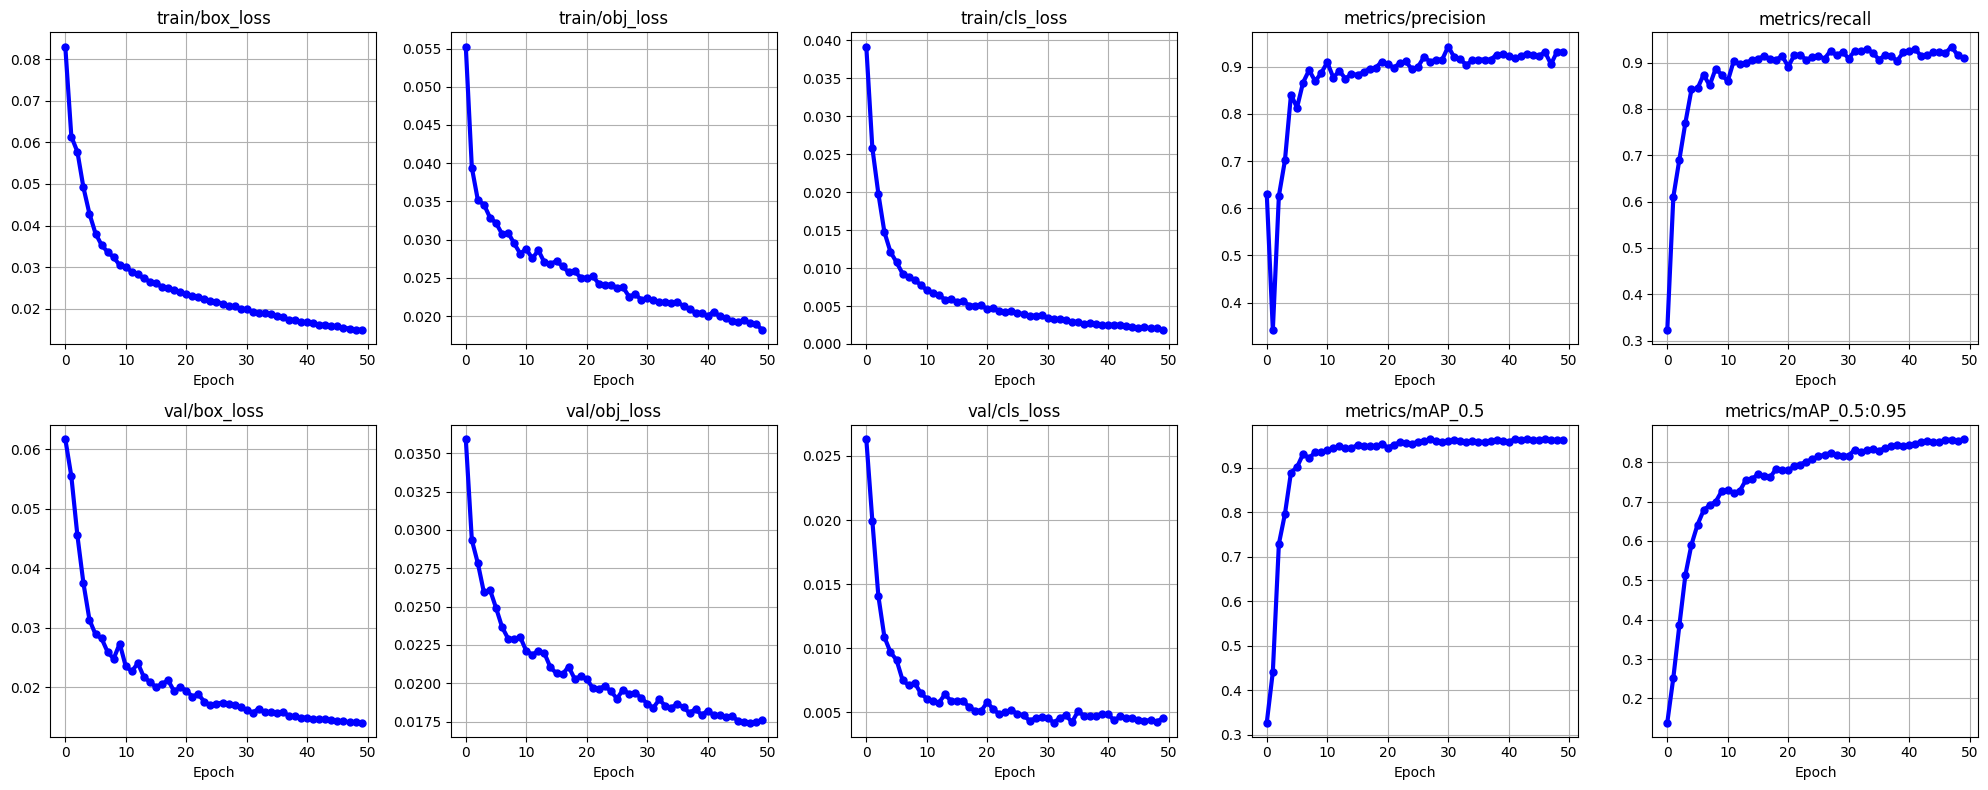

In [21]:
#Bi·ªÉu ƒë·ªì train 50 epochs

!pip install matplotlib pandas

# 1. Import th∆∞ vi·ªán
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. ƒê·ªçc file CSV (thay ƒë∆∞·ªùng d·∫´n n·∫øu b·∫°n ƒë√£ ƒë·ªïi t√™n ho·∫∑c v·ªã tr√≠)
csv_path = '/content/yolov5/runs/train/exp/results.csv'  # ho·∫∑c ƒë∆∞·ªùng d·∫´n t·ªõi file b·∫°n upload
df = pd.read_csv(csv_path)

# 3. L√†m s·∫°ch t√™n c·ªôt (x√≥a kho·∫£ng tr·∫Øng ƒë·∫ßu/cu·ªëi)
df.columns = df.columns.str.strip()

# 4. Danh s√°ch metric c·∫ßn v·∫Ω
metrics = [
    'train/box_loss', 'train/obj_loss', 'train/cls_loss',
    'metrics/precision', 'metrics/recall',
    'val/box_loss', 'val/obj_loss', 'val/cls_loss',
    'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'
]

# 5. V·∫Ω bi·ªÉu ƒë·ªì 2 h√†ng x 5 c·ªôt
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, metric in enumerate(metrics):
    row, col = divmod(i, 5)
    axs[row][col].plot(
        df[metric],
        color='blue',
        linewidth=3,
        marker='o',
        markersize=5
    )
    axs[row][col].set_title(metric, fontsize=12)
    axs[row][col].set_xlabel('Epoch')
    axs[row][col].grid(True)

plt.tight_layout()
plt.show()

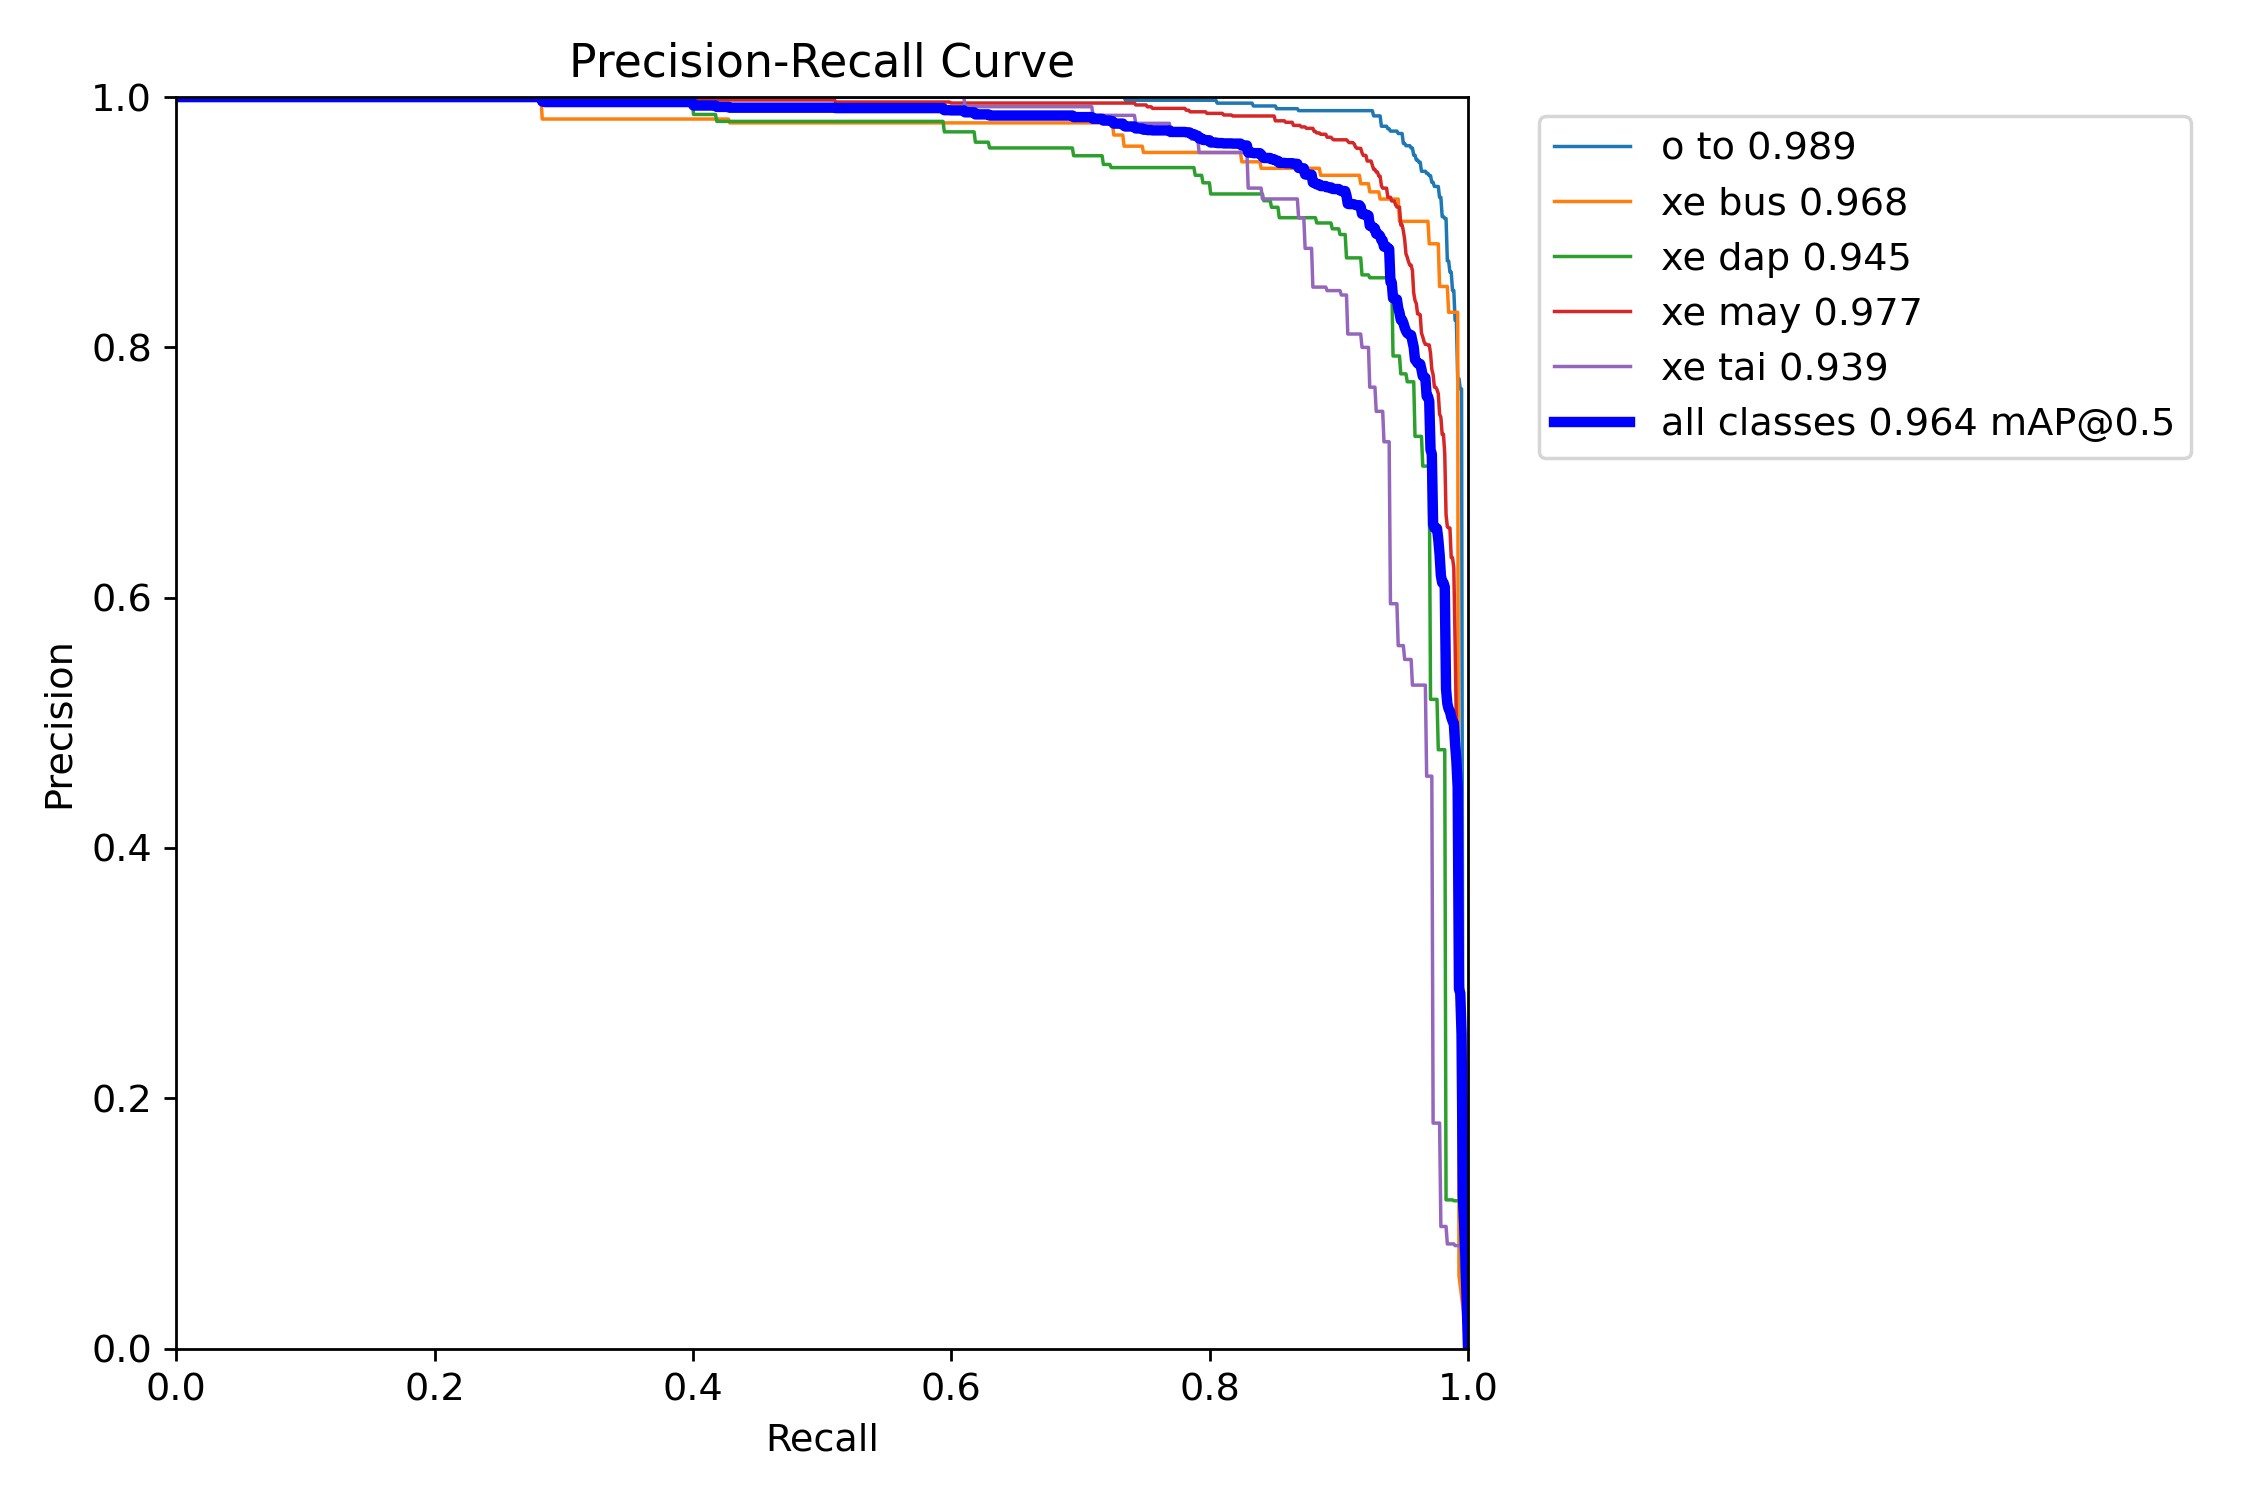

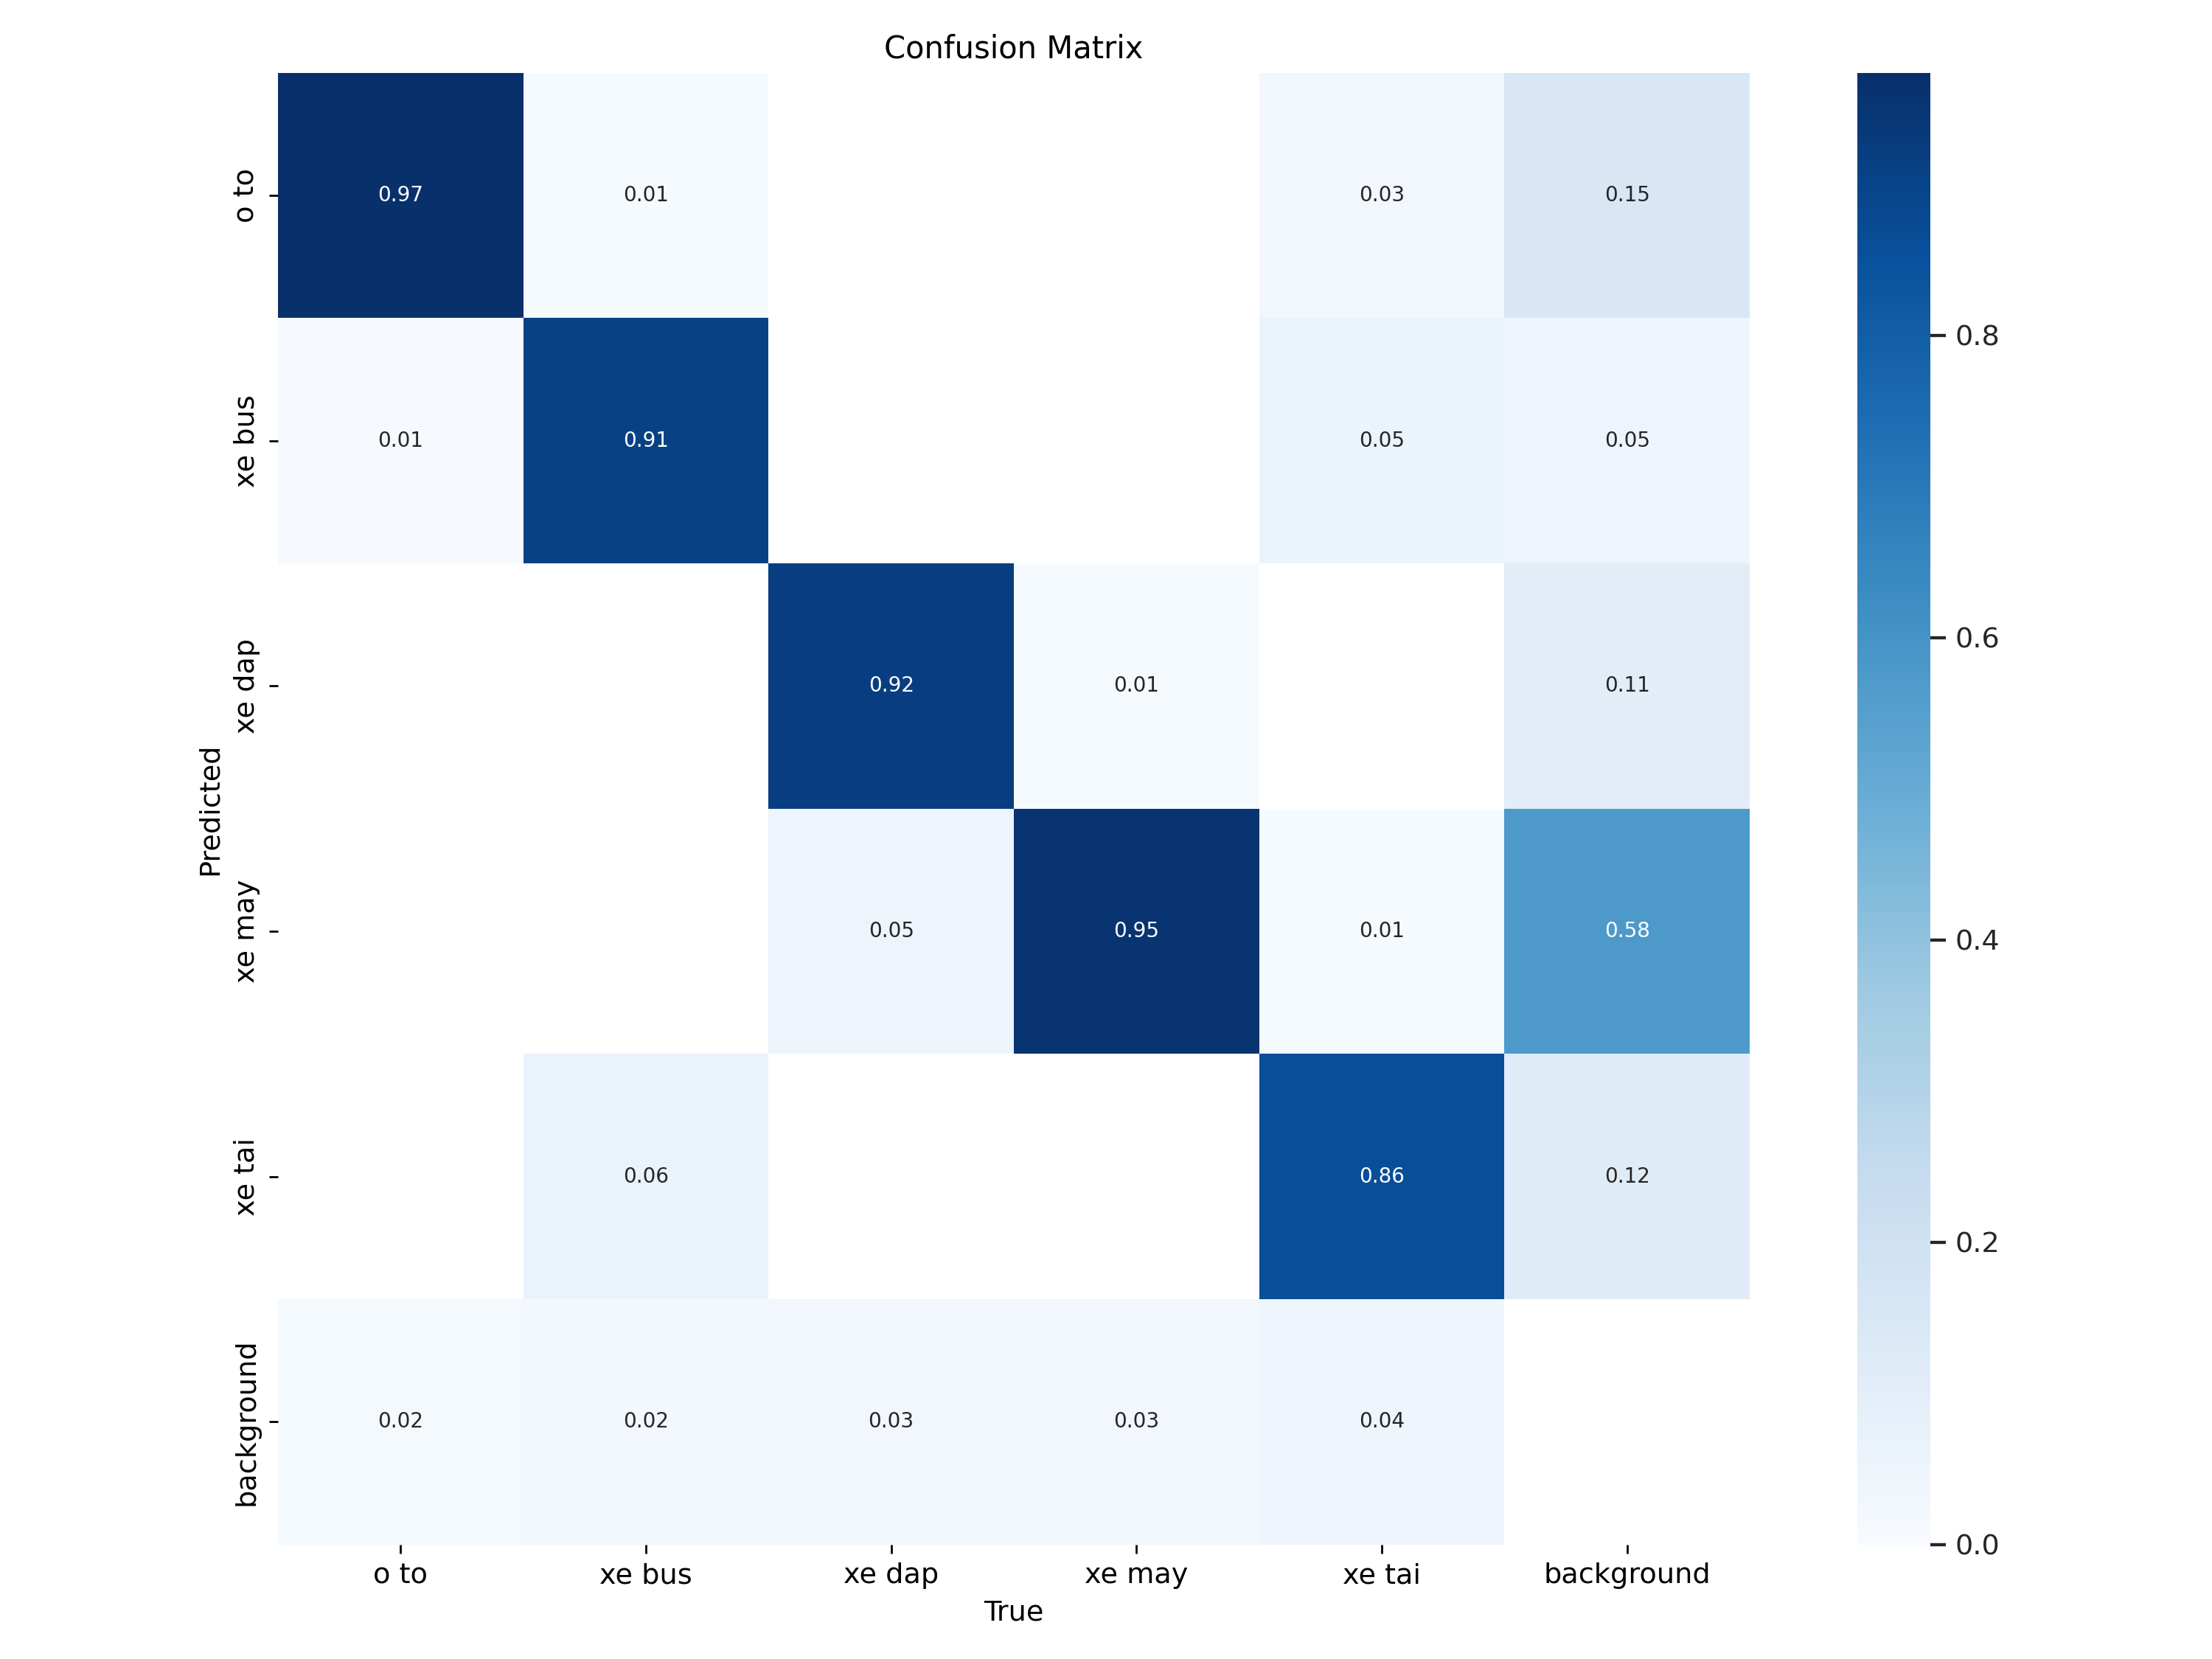

In [22]:
#Bi·ªÉu ƒë·ªì Precision - Recall Curve v√† Bi·ªÉu ƒë·ªì Confusion Matrix

from IPython.display import Image, display

display(Image('/content/yolov5/runs/train/exp/PR_curve.png', width=500))
display(Image('/content/yolov5/runs/train/exp/confusion_matrix.png', width=500))

In [11]:
!python /content/yolov5/detect.py --source /content/yolov5/data/images --weights /content/yolov5/runs/train/exp2/weights/best.pt --conf 0.25 --save-txt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/yolov5/data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "

In [12]:
import glob
from IPython.display import Image, display

# L·∫•y danh s√°ch ·∫£nh k·∫øt qu·∫£
result_images = glob.glob('/content/yolov5/runs/detect/exp3/*.jpg')

# Hi·ªÉn th·ªã 3 ·∫£nh ƒë·∫ßu ti√™n v·ªõi k√≠ch th∆∞·ªõc 640x640
for img_path in result_images[:1]:
    display(Image(filename=img_path, height=640))


In [13]:
import glob
from IPython.display import Image, display
import os

# ƒê·ªãnh nghƒ©a danh s√°ch c√°c nh√£n vi ph·∫°m
VIOLATION_CLASSES = ['xe may', 'xe dap', 'xe bus']

# ƒê∆∞·ªùng d·∫´n t·ªõi th∆∞ m·ª•c ch·ª©a k·∫øt qu·∫£ ph√°t hi·ªán
detect_folder = '/content/yolov5/runs/detect/exp3'

# H√†m ki·ªÉm tra xem ·∫£nh c√≥ ch·ª©a nh√£n vi ph·∫°m kh√¥ng
def analyze_objects(label_path, class_names, violation_classes):
    if not os.path.exists(label_path):
        print(f"[‚ùå] Kh√¥ng t√¨m th·∫•y file nh√£n: {label_path}")
        return False

    with open(label_path, 'r') as f:
        lines = f.readlines()

    violated = 0

    print(f"\n[üîç] Ki·ªÉm tra: {os.path.basename(label_path).replace('.txt', '')}")
    for idx, line in enumerate(lines):
        parts = line.strip().split()
        class_id = int(parts[0])
        class_name = class_names[class_id]

        if class_name in violation_classes:
            print(f"‚Üí Object {idx}: {class_name:<8} ‚ùå VI PH·∫†M")
            violated += 1
        else:
            print(f"‚Üí Object {idx}: {class_name:<8} ‚úîÔ∏è H·ª£p l·ªá")

    print(f"‚úÖ T·ªïng c·ªông {violated} VI PH·∫†M trong ·∫£nh")
    return violated > 0


# Danh s√°ch t√™n class t·ª´ file YAML
class_names = ['o to', 'xe bus', 'xe dap', 'xe may', 'xe tai']

# L·∫•y danh s√°ch ·∫£nh k·∫øt qu·∫£
result_images = glob.glob(os.path.join(detect_folder, '*.jpg'))

# Hi·ªÉn th·ªã 3 ·∫£nh ƒë·∫ßu ti√™n v·ªõi k√≠ch th∆∞·ªõc 640x640 v√† ki·ªÉm tra vi ph·∫°m
for img_path in result_images[:3]:
    file_name = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(detect_folder, 'labels', file_name + '.txt')

    if not os.path.exists(label_path):
        print(f"[‚ùå] Kh√¥ng t√¨m th·∫•y file nh√£n: {label_path}")
        continue

    print(f"\n[üîç] Ki·ªÉm tra: {file_name}")
    with open(label_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        class_id = int(line.split()[0])
        class_name = class_names[class_id]
        print(f" ‚Üí Ph√°t hi·ªán object: {class_name}")

    if analyze_objects(label_path, class_names, VIOLATION_CLASSES):
      print(f"·∫¢nh {os.path.basename(img_path)} ‚úÖ VI PH·∫†M")
    else:
      print(f"·∫¢nh {os.path.basename(img_path)} ‚ùé KH√îNG vi ph·∫°m")

# Hi·ªÉn th·ªã ·∫£nh___
    display(Image(filename=img_path, width=640, height=640))


In [14]:
!pip install streamlit pyngrok


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.9/9.9 MB 48.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 85.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


In [15]:
!ngrok config add-authtoken 2ySj3AFJkUvLncuFN4De21GCJ6T_3vuGhUJ2QejZVG9dYmAjM


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [16]:
%%writefile app.py
import streamlit as st
import torch
from PIL import Image
import os
import tempfile
import numpy as np
import cv2
# Danh s√°ch l·ªõp ph∆∞∆°ng ti·ªán
CLASS_NAMES = ['o to', 'xe bus', 'xe dap', 'xe may', 'xe tai']
VIOLATION_CLASSES = ['xe may', 'xe dap', 'xe bus']

@st.cache_resource(show_spinner=True)
def load_model():
    model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', source='local')
    return model

model = load_model()

st.title("üö¶ Nh·∫≠n di·ªán ph∆∞∆°ng ti·ªán vi ph·∫°m giao th√¥ng")
st.write("T·∫£i ·∫£nh l√™n ƒë·ªÉ nh·∫≠n di·ªán: o to, xe bus, xe dap, xe may, xe tai")

uploaded_file = st.file_uploader("üì§ Ch·ªçn ·∫£nh...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='·∫¢nh g·ªëc', use_container_width=True)

    with tempfile.NamedTemporaryFile(delete=False, suffix='.jpg') as tmp_file:
        tmp_path = tmp_file.name
        image.save(tmp_path)

    results = model(tmp_path)
    results.render()

    result_img = Image.fromarray(cv2.cvtColor(results.ims[0], cv2.COLOR_BGR2RGB))
    st.image(result_img, caption='K·∫øt qu·∫£ d·ª± ƒëo√°n', use_container_width=True)

    detections = results.pandas().xyxy[0]

    st.write("### K·∫øt qu·∫£ chi ti·∫øt:")
    violated = 0

    for idx, row in detections.iterrows():
        class_name = row['name']
        confidence = row['confidence']
        st.write(f"- ƒê·ªëi t∆∞·ª£ng {idx + 1}: `{class_name}` - ƒê·ªô tin c·∫≠y: {confidence:.2f}")
        if class_name in VIOLATION_CLASSES:
            violated += 1

    if violated > 0:
        st.error(f"‚õî Ph√°t hi·ªán {violated} ph∆∞∆°ng ti·ªán vi ph·∫°m!")
    else:
        st.success("‚úÖ Kh√¥ng ph√°t hi·ªán vi ph·∫°m.")


Writing app.py


In [17]:
%%writefile run.py
import os
import threading
from pyngrok import ngrok

# M·ªü c·ªïng 8501 cho Streamlit
public_url = ngrok.connect(port=8501)
print("Ngrok URL:", public_url)

# Ch·∫°y streamlit app
os.system("streamlit run app.py")


Writing run.py


In [18]:
from pyngrok import ngrok
import os
import time

# Ch·∫°y Streamlit app ·ªü n·ªÅn
os.system("streamlit run app.py &")
time.sleep(3)  # ch·ªù Streamlit kh·ªüi ƒë·ªông

# T·∫°o tunnel ngrok v·ªõi proto v√† ƒë·ªãa ch·ªâ r√µ r√†ng
public_url = ngrok.connect(addr="8501", proto="http")
print("üåç App URL:", public_url)


üåç App URL: NgrokTunnel: "https://6e24-34-143-137-120.ngrok-free.app" -> "http://localhost:8501"


In [19]:
#n·∫øu b·ªã ghi ƒë√® th√¨ ch·∫°y hai l·ªánh n√†y
!ls -l app.py
!cat app.py

-rw-r--r-- 1 root root 1771 Jun 14 11:08 app.py
import streamlit as st
import torch
from PIL import Image
import os
import tempfile
import numpy as np
import cv2
# Danh s√°ch l·ªõp ph∆∞∆°ng ti·ªán
CLASS_NAMES = ['o to', 'xe bus', 'xe dap', 'xe may', 'xe tai']
VIOLATION_CLASSES = ['xe may', 'xe dap', 'xe bus']

@st.cache_resource(show_spinner=True)
def load_model():
    model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', source='local')
    return model

model = load_model()

st.title("üö¶ Nh·∫≠n di·ªán ph∆∞∆°ng ti·ªán vi ph·∫°m giao th√¥ng")
st.write("T·∫£i ·∫£nh l√™n ƒë·ªÉ nh·∫≠n di·ªán: o to, xe bus, xe dap, xe may, xe tai")

uploaded_file = st.file_uploader("üì§ Ch·ªçn ·∫£nh...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='·∫¢nh g·ªëc', use_container_width=True)

    with tempfile.NamedTemporaryFile(delete=False, suffix='.jpg') as tmp_file:
        tmp_path = tm

In [20]:
!pkill streamlit